In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as T

from PIL import Image
from net import AutoEncoder

/home/ho/.local/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/ho/.local/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
def plot_img(ori, pre):
    fig, axes = plt.subplots(1, 2, figsize=(8, 5))
    
    ori_img = ori.detach().cpu().numpy().transpose(1, 2, 0)
    axes[0].imshow(ori_img)
    axes[0].axis("off")

    pre_img = pre.detach().cpu().numpy().transpose(1, 2, 0)
    axes[1].imshow(pre_img)
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


In [3]:
def predict_image(img_path, net, device):
    img = Image.open(img_path).convert('RGB')
    
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor()
    ])

    img = transform(img).unsqueeze(0).to(device)
    print(img.shape)
    
    net.eval()
    with torch.no_grad():
        _, predict = net(img)
    
    plot_img(img.squeeze(0), predict.squeeze(0))


torch.Size([1, 3, 224, 224])


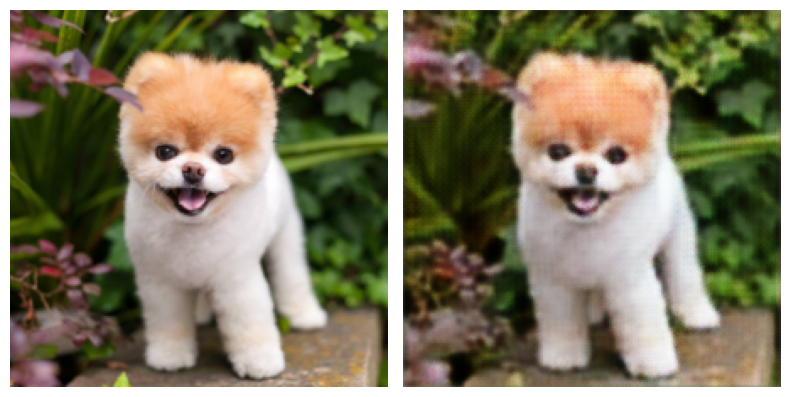

In [4]:
# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# test image
image_path = '../../datasets/test1.jpg'

# test
net = AutoEncoder()
net.load_state_dict(torch.load(f'./result/resnet_light.pth'))
net.to(device)

# plot
predict_image(image_path, net, device)